In [73]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [74]:
# load dataset
df = pd.read_csv("diabetes.csv", header=0)

In [75]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


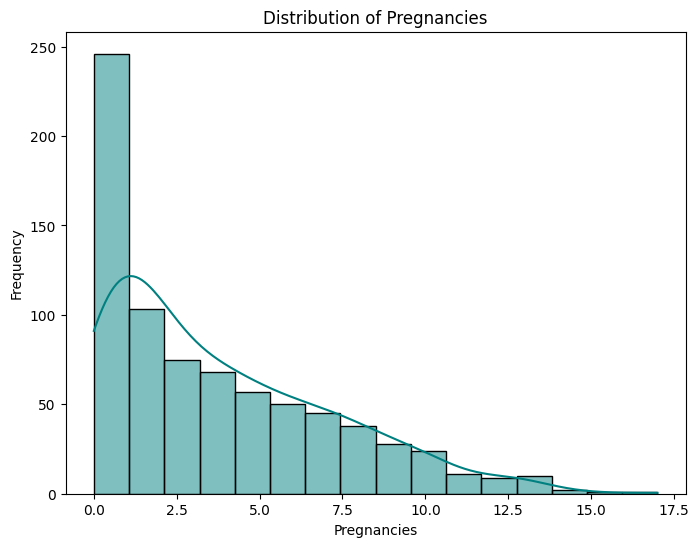

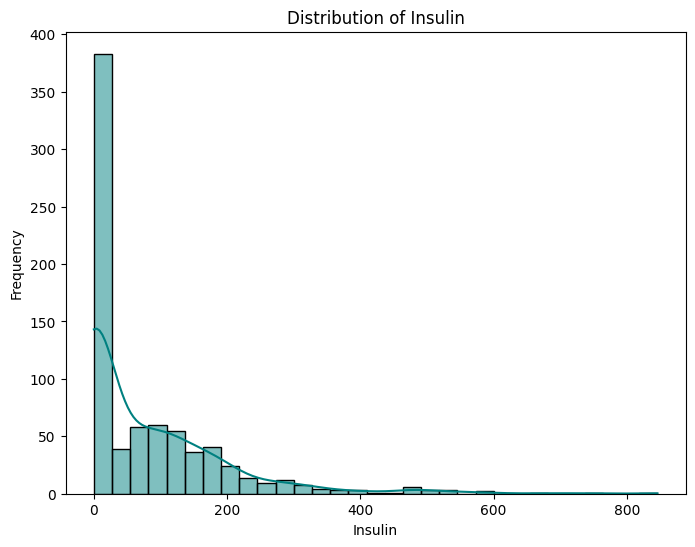

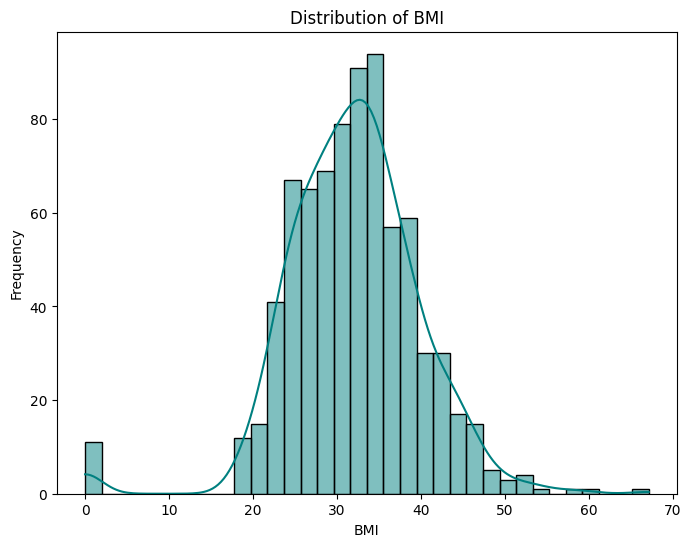

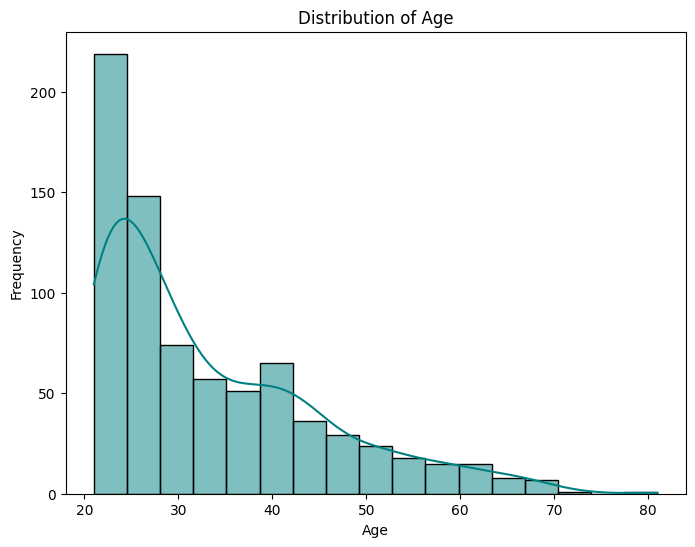

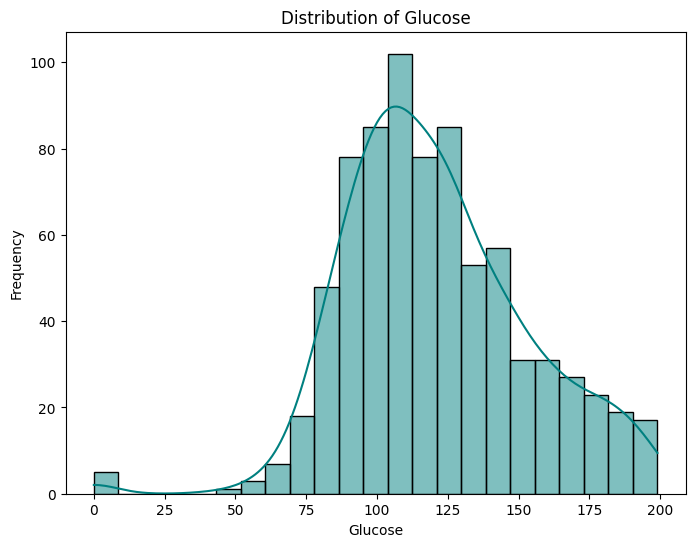

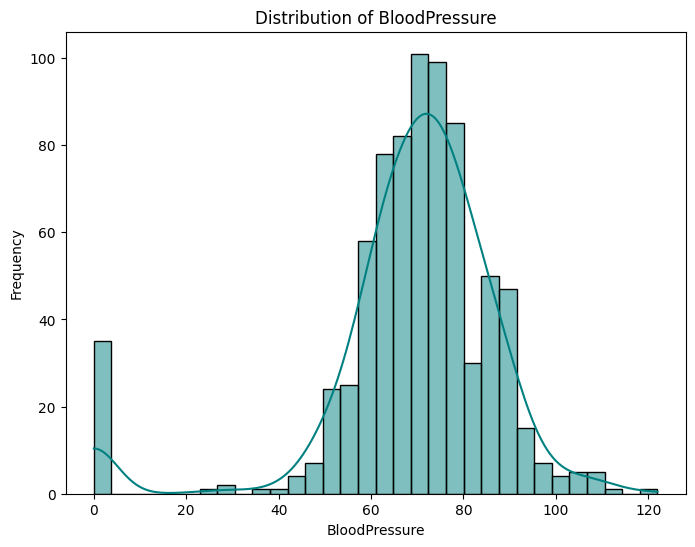

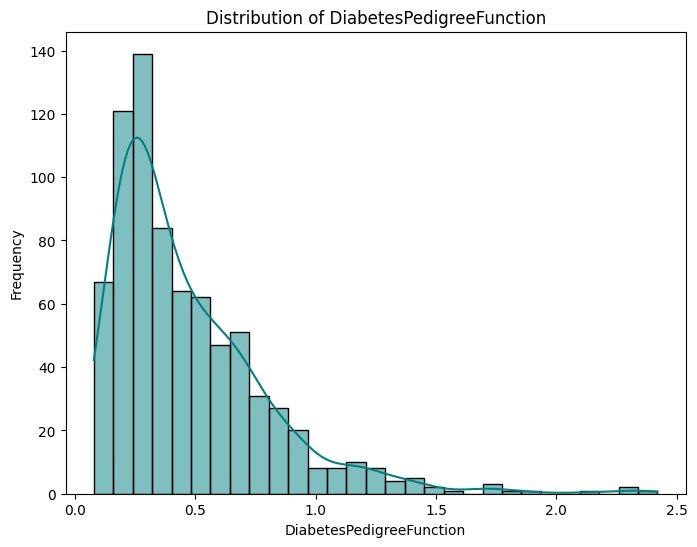

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for each feature
for feature in feature_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True,color='teal')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

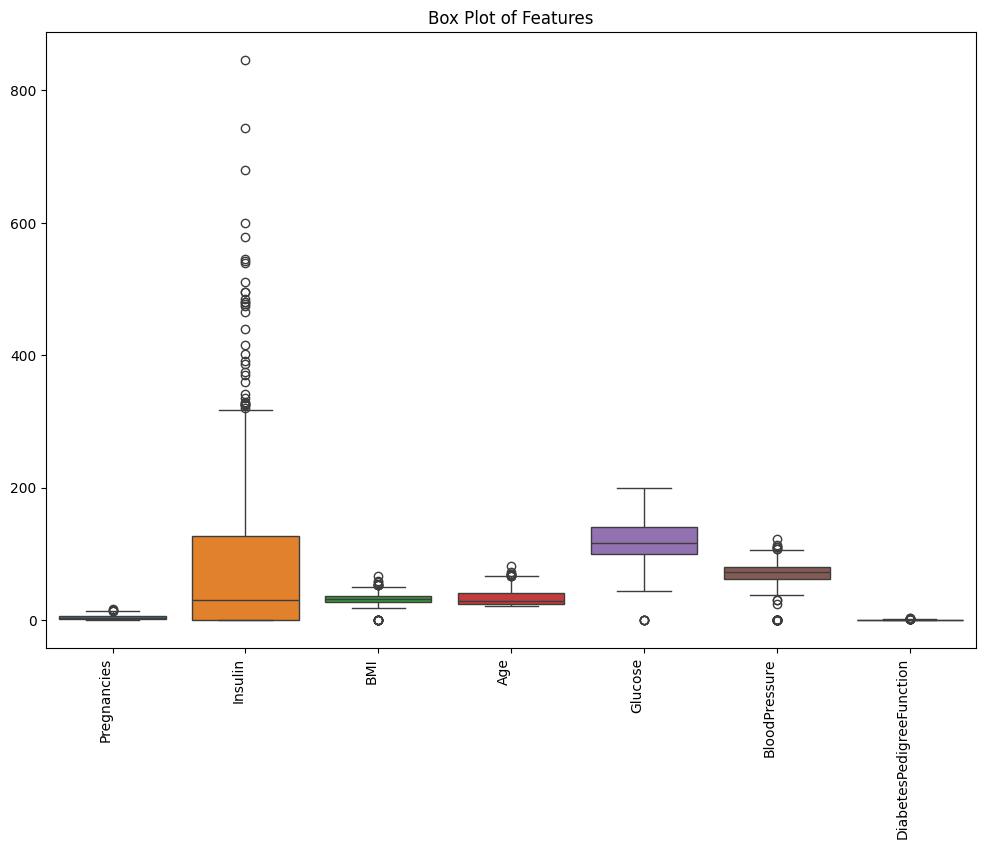

In [79]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[feature_cols])
plt.title('Box Plot of Features')
plt.xticks(rotation=90, ha='right')
plt.show()

In [80]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = df[feature_cols] # Features
y = df['Outcome']    # Target variable


In [81]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [82]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7532467532467533


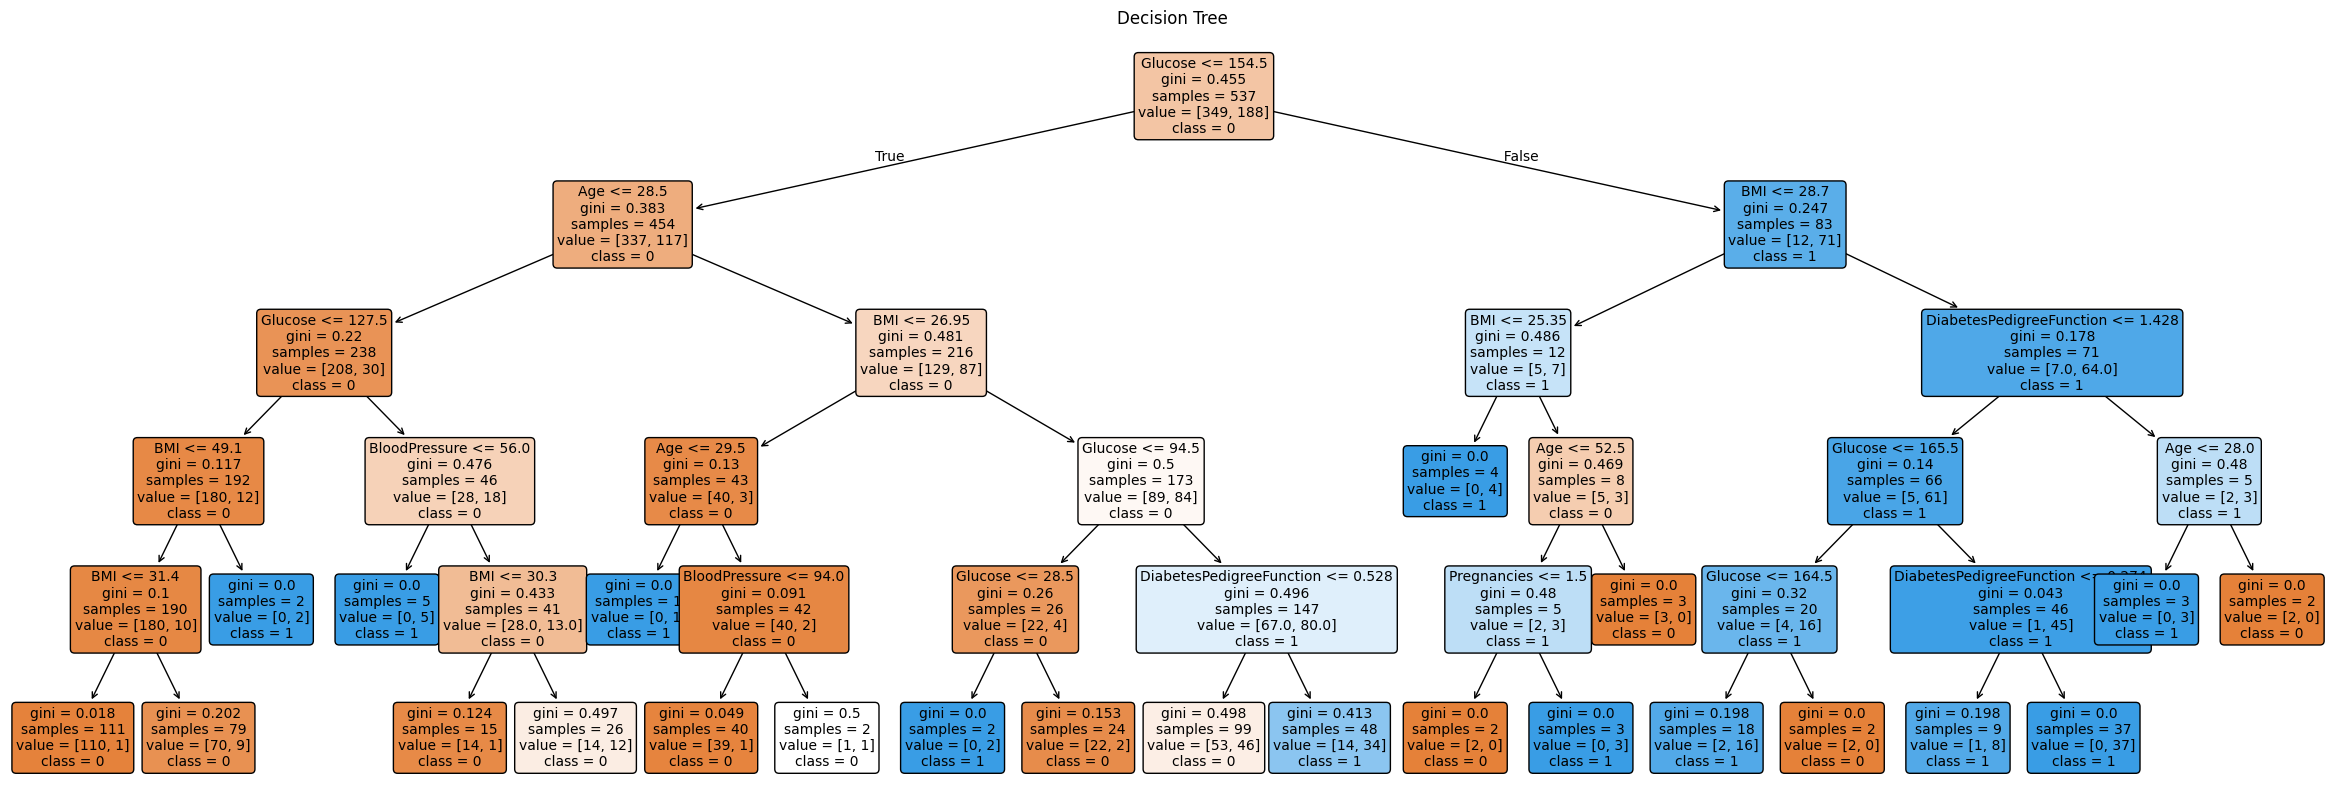

In [83]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 10))
plot_tree(clf,
          feature_names=feature_cols,
          class_names=['0', '1'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree')
plt.show()

In [84]:
# Normalising the data
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [105]:
# Defining the SVM classification model
from sklearn.svm import SVC
SVM_classifier = SVC(C=2.0,kernel = 'rbf', random_state = 0)

In [106]:
# Training the SVM classifier
SVM_classifier.fit(X_train, y_train)

SVC(C=2.0, random_state=0)

In [107]:
# Making predictions with the test data
y_pred = SVM_classifier.predict(X_test)

In [108]:
# Combining the predicted and actual values
output=pd.DataFrame(data={'Predicted Labels': y_pred, 'Actual Labels': y_test})
output.to_csv("output.csv")
print("Saved!")

Saved!


In [109]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[127  24]
 [ 31  49]]


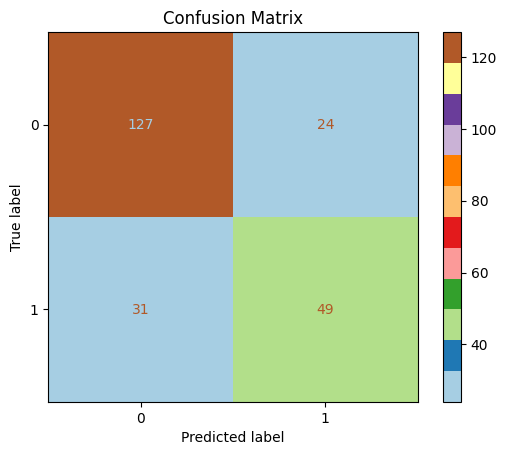

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap='Paired', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [124]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       151
           1       0.67      0.61      0.64        80

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



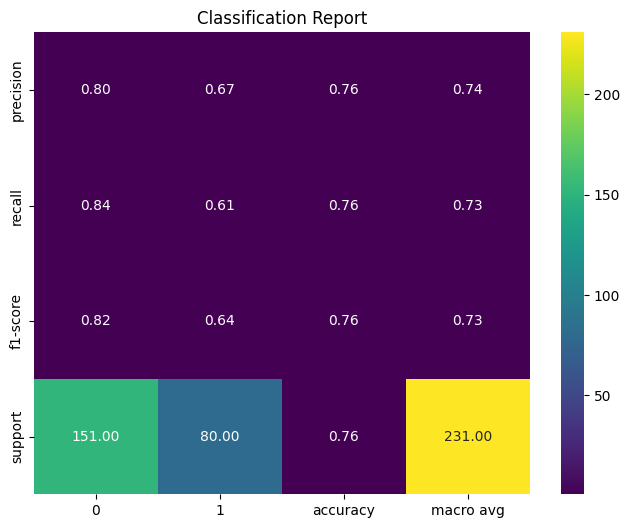

In [125]:
import seaborn as sns
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='viridis', fmt=".2f")
plt.title('Classification Report')
plt.show()